In [59]:
import pandas as pd
from sklearn import metrics
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors

In [52]:
blobsData = pd.read_csv('data/blobs.txt',sep=" ",)
blobsData = blobsData.values
min_max_scaler = preprocessing.MinMaxScaler()
blobsData = min_max_scaler.fit_transform(blobsData)
blobsData[:10]

array([[0.1388995 , 0.37664311],
       [0.28512199, 0.23506993],
       [0.19502093, 0.3087942 ],
       [0.08904476, 0.42656082],
       [0.13691311, 0.42145037],
       [0.78569864, 0.78888357],
       [0.15094923, 0.29650354],
       [0.88995968, 0.73017426],
       [0.78103924, 0.68775033],
       [0.271999  , 0.29385727]])

In [73]:
neigh = NearestNeighbors(n_neighbors=4)
neigh.fit(blobsData)
distance,ind = neigh.kneighbors(blobsData,4)
print(ind)
plt.plot(np.linspace(1, len(blobsData),num=len(blobsData) ),distance[0][:])

[[   0 1412 2938  151]
 [   1 1968 1201  433]
 [   2 1221  318 1646]
 ...
 [2997  735 2101 1946]
 [2998  167 2544 2640]
 [2999 1292 2553  260]]


ValueError: x and y must have same first dimension, but have shapes (3000,) and (4,)

In [ ]:
eps = 0.08
min_samples = 5

In [56]:

blobsData_dbscan = DBSCAN(eps=eps, min_samples=min_samples)
blobsData_dbscan.fit(blobsData)

DBSCAN(eps=0.08)

In [57]:
labels = blobsData_dbscan.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[blobsData_dbscan.core_sample_indices_] = True
n_clusters_ = len(set(labels)) 
if -1 in labels:
    n_clusters_-=1
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 0


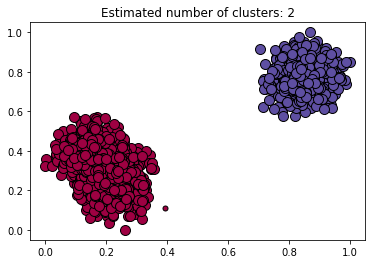

In [58]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = "k"
    class_member_mask = (labels == k)
    xy = blobsData[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=col,markeredgecolor="k", markersize=10)
    xy = blobsData[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=col,markeredgecolor="k", markersize=5)
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()